In [1]:
%run imports.py
%run utils_data.py

Importing modules...
Module import successful.


In [2]:
sbj, session = 4, 4
nwb = load_nwb(sbj, session, use_cloud_file=True)

Retrieving cloud file...


A newer version (0.45.1) of dandi/dandi-cli is available. You are using 0.44.1


Starting a Dandi streaming client...
Reading a file...
Returning nwb for sub-04_ses-4_behavior+ecephys.nwb


In [3]:
board = BruntonDashboard(nwb, tab1='stream')
board

BruntonDashboard(children=(Accordion(children=(Tab(children=(VBox(children=(HBox(children=(StartAndDurationCon…

### Reading neural data

In [72]:
neural_data = nwb.acquisition['ElectricalSeries'].data

print("Neural data shape: ", neural_data.shape)
n_times, n_chan = neural_data.shape
SFREQ = nwb.acquisition['ElectricalSeries'].rate
print("Sampling rate: ", SFREQ)

info = mne.create_info(n_chan, sfreq=SFREQ)

max_time = 100 #sec
#mne_data_chunk = mne.io.RawArray(neural_data[:int(max_time * SFREQ)].reshape(n_chan, -1), info)

Neural data shape:  (43200000, 84)
Sampling rate:  500.0


In [27]:
nwb.acquisition['ElectricalSeries'].electrodes[0].values

array([[27.220214612772153, 43.561681263750415, 46.99796022920193, nan,
        'unknown', '250 Hz lowpass',
        GRID pynwb.ecephys.ElectrodeGroup at 0x2555507990336
        Fields:
          description: ECoG grid
          device: GRID pynwb.device.Device at 0x2555508127344
          location: unknown                                  , 'GRID',
        55.88888965919866, 35.77641705569218, 41.416732786560054, False,
        -0.028976284843703293, -0.07646852345323812]], dtype=object)

### Reach events

Paper -> https://www.eneuro.org/content/8/3/ENEURO.0007-21.2021

**Reach movement features**

Movement states were identified by applying a first-order autoregressive hidden semi-Markov model to each wrist trajectory. This state segmentation model classified the wrist trajectory into either a move or rest state. For this study, we focused on movements of the wrist contralateral to the implanted hemisphere. Contralateral wrist states were then discretized, and movement initiation events were identified at state transitions where 0.5 s of rest states are followed by 0.5 s of move states (Singh et al., 2020).

After identifying movement initiation events, we coarsely labeled the video data manually (∼3 min resolution) and excluded arm movements during sleep, unrelated experiments, and private times (as specified in our Institutional Review Board protocol). In addition, we only retained movement events where (1) movement durations were between 0.5–4 s; (2) the confidence scores from DeepLabCut were >0.4, indicating minimal marker occlusion; and (3) wrist movements followed a parabolic trajectory, as determined by a quadratic fit to the wrist’s radial movement (R2>0.6 ). We found that this quadratic fit criteria eliminated many outliers with complex movement trajectories and improved the interpretability of our subsequent analyses (Polyakov et al., 2009). For each day of recording, we selected up to 200 events with the highest movement-onset velocities. Finally, all movement initiation events were visually inspected, and events with occlusions or false-positive movements were removed (17.8 ± 9.9% of events (mean ± SD)].

To quantify differences in the detected movements, we defined a reach as the maximum radial displacement of the wrist marker during the detected move state compared with its position at each movement initiation event. These features included the duration and magnitude of each reach. We also computed the 2D reach angle and transformed angles at 90–270∘ to range from 90∘ to −90∘, respectively. This transformation made the reach angle sensitive to vertical reach variations, with 90∘ for upward reaches and −90∘ for downward reaches. We also computed wrist marker radial speed during movement onset. Note that these movement features were based on the location of the video camera, which varied slightly across subjects and recording days.



In [6]:
timestamps = nwb.processing['behavior']['ReachEvents'].timestamps
reaches = nwb.intervals['reaches']
reaches[0]

,start_time,stop_time,Reach_magnitude_px,Reach_angle_degrees,Onset_speed_px_per_sec,Speech_ratio,Bimanual_ratio,Bimanual_overlap,Bimanual_class
id,,,,,,,,,
0,254.977,255.910333,127.424495,-34.012325,132.76267,0.245735,0.096979,0.733333,1.0


In [7]:
keypoints = list(nwb.processing['behavior'].data_interfaces['Position'].spatial_series.keys())
print(keypoints)

keypoint_of_interest = 'L_Wrist'
pose_direction = 'vertical'

['L_Ear', 'L_Elbow', 'L_Shoulder', 'L_Wrist', 'Nose', 'R_Ear', 'R_Elbow', 'R_Shoulder', 'R_Wrist']


In [14]:
keypoint_series = nwb.processing['behavior'].data_interfaces['Position'].spatial_series[keypoint_of_interest]
SF_keypoint = keypoint_series.rate  # Hz

In [73]:
keypoint_series

L_Wrist pynwb.behavior.SpatialSeries at 0x2643385678336
Fields:
  comments: no comments
  conversion: nan
  data: <HDF5 dataset "data": shape (2592000, 2), type "<f8">
  description: no description
  rate: 30.0
  reference_frame: unknown
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: meters

In [76]:
neural_data[0]

KeyboardInterrupt: 

In [65]:
cur_reaches

,start_time,stop_time,Reach_magnitude_px,Reach_angle_degrees,Onset_speed_px_per_sec,Speech_ratio,Bimanual_ratio,Bimanual_overlap,Bimanual_class
id,,,,,,,,,
10,4342.376,4344.609333,173.597069,-127.178488,186.570234,0.307406,0.237345,2.066667,1.0
11,5488.964,5490.430667,164.038481,-171.191045,313.909168,0.409590,0.534710,0.966667,1.0
12,6431.094,6432.360667,292.656720,-143.546993,211.280292,0.253439,0.384321,1.266667,1.0
13,6943.540,6944.373333,123.650895,29.455688,468.798281,0.195066,0.011477,0.000000,0.0
14,7747.476,7747.809333,130.174699,-159.395347,542.284305,0.120400,0.229242,0.333333,1.0
15,9034.062,9035.128667,41.919562,-140.902717,145.576293,0.232937,0.097206,0.100000,1.0
16,9251.700,9252.466667,41.048131,162.895910,120.440761,0.237165,0.000000,0.766667,1.0
17,9459.722,9460.455333,29.529289,-20.899058,22.567959,0.223858,0.547719,0.566667,1.0
18,9545.306,9547.139333,128.738914,149.074353,457.092851,0.169250,0.516466,1.733333,1.0


In [9]:
keypoint_series

L_Wrist pynwb.behavior.SpatialSeries at 0x2643385678336
Fields:
  comments: no comments
  conversion: nan
  data: <HDF5 dataset "data": shape (2592000, 2), type "<f8">
  description: no description
  rate: 30.0
  reference_frame: unknown
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: meters

In [29]:
reaches[0:10].loc[0, 'start_time']

254.977

In [66]:
reaches[0:10]

,start_time,stop_time,Reach_magnitude_px,Reach_angle_degrees,Onset_speed_px_per_sec,Speech_ratio,Bimanual_ratio,Bimanual_overlap,Bimanual_class
id,,,,,,,,,
0,254.977,255.910333,127.424495,-34.012325,132.762670,0.245735,9.697919e-02,0.733333,1.0
1,1397.733,1398.699667,80.257231,-5.089149,108.090505,0.238868,1.888703e-02,0.000000,0.0
2,2559.419,2561.085667,107.442931,-93.453943,156.227053,0.571478,5.470961e-01,0.833333,1.0
3,2616.139,2617.139000,33.546207,40.726494,24.769921,0.491370,2.570535e-01,0.866667,1.0
4,2766.326,2766.926000,21.104538,-10.812093,34.556196,0.323998,4.277634e-01,0.000000,0.0
5,2871.980,2872.980000,73.640745,-82.134622,38.611331,0.226762,2.437418e-02,0.133333,1.0
6,3041.566,3042.732667,49.547262,-123.968595,62.550592,0.237117,2.485517e-01,0.433333,1.0
7,4233.596,4233.929333,228.514999,-130.325077,504.869069,0.293223,7.570000e-16,0.333333,1.0
8,4274.029,4274.362333,232.566449,46.922369,498.680035,0.278751,5.360000e-16,0.333333,1.0


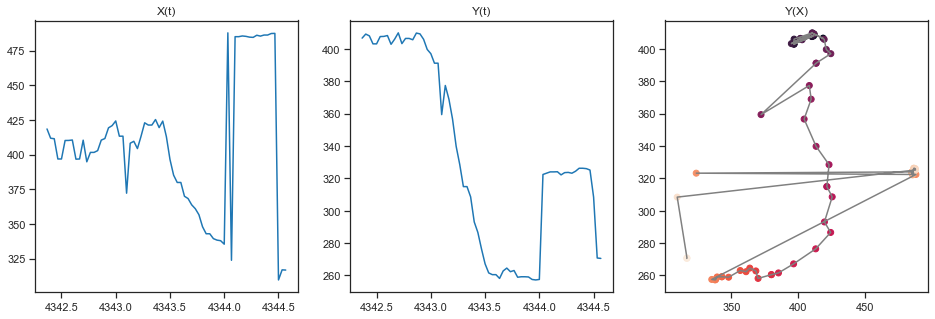

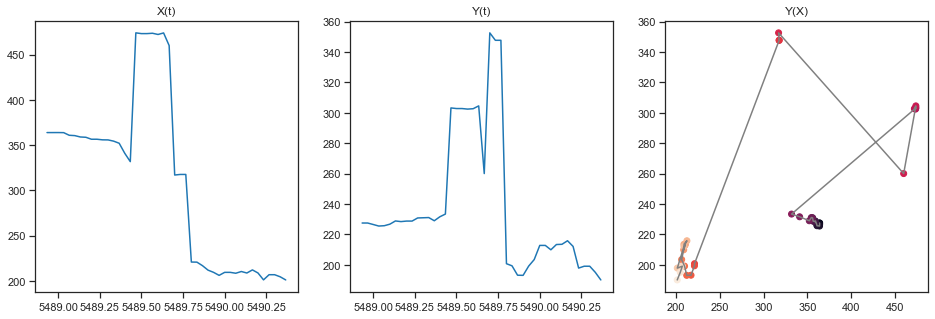

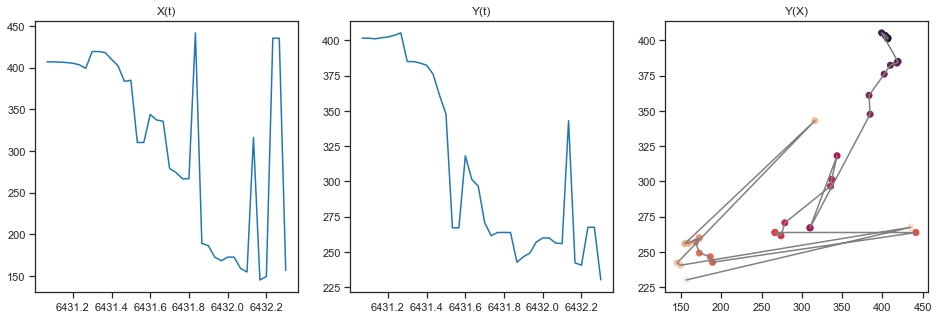

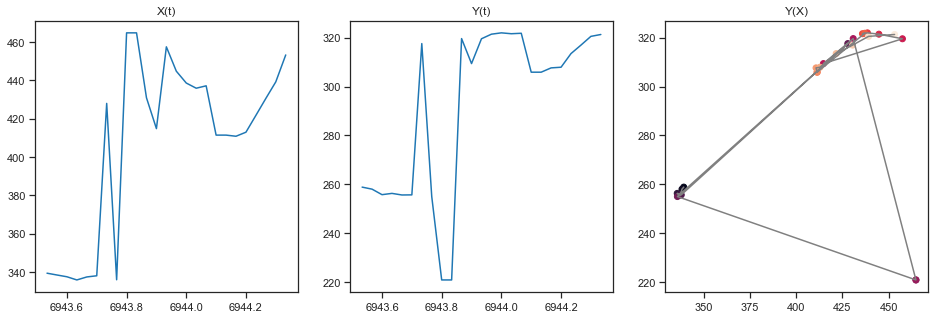

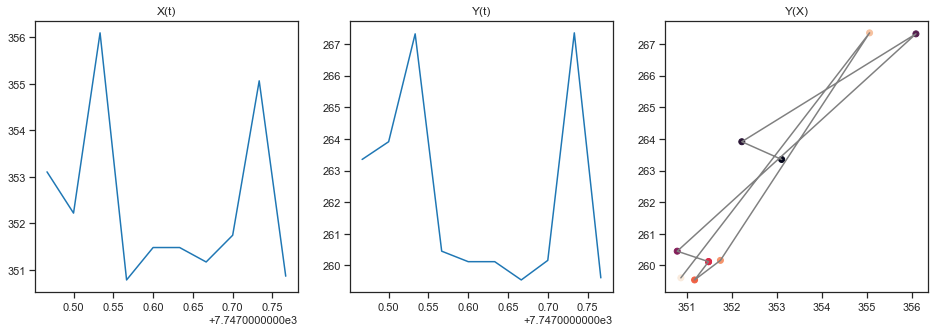

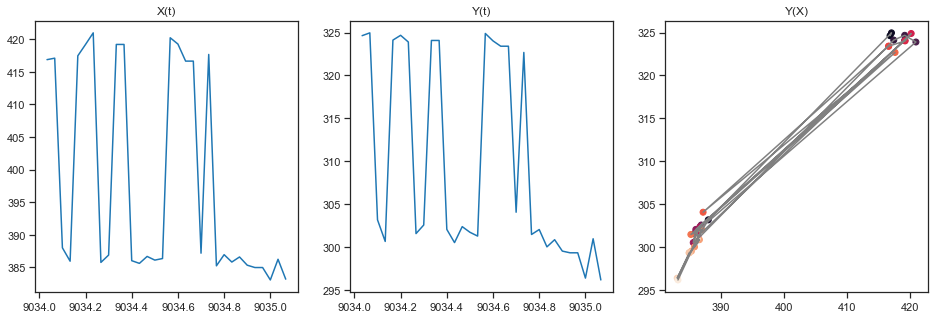

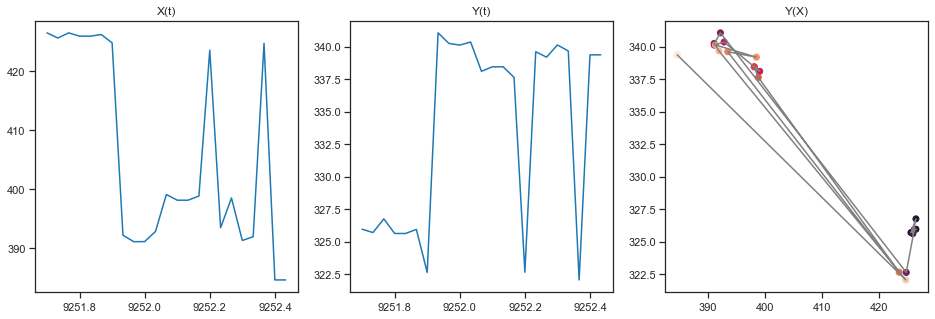

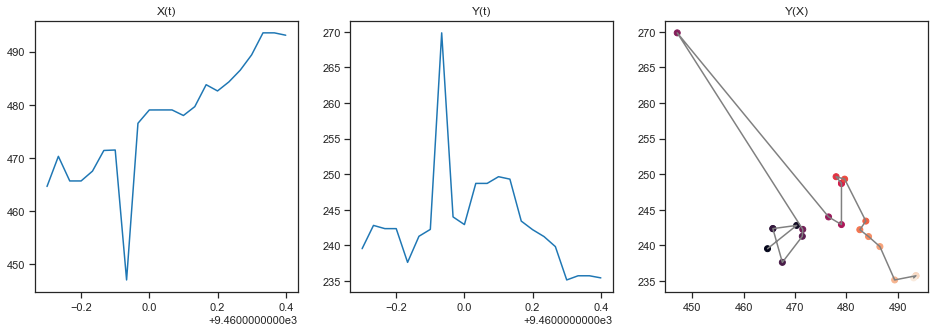

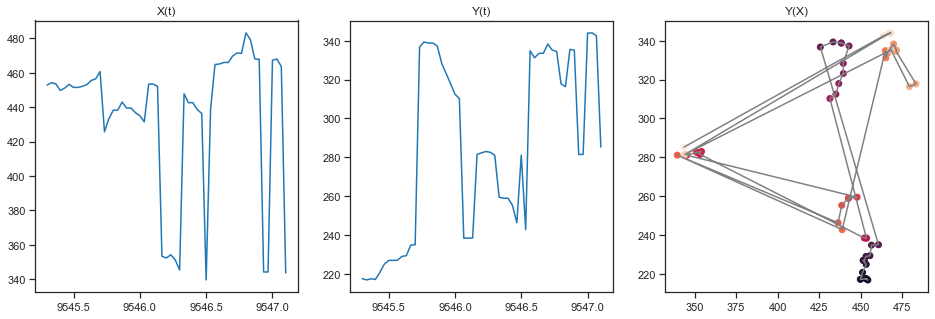

In [69]:
%matplotlib inline
sns.set_context('notebook')
sns.set_style('ticks')
sns.color_palette('bright')

cur_reaches = reaches[10:20]    # sub-dataframe of reaches
duration = 5                    # in seconds

for i, reach in enumerate(cur_reaches):
    t_start = cur_reaches.loc[i + cur_reaches.index[0], 'start_time']
    t_stop = cur_reaches.loc[i + cur_reaches.index[0], 'stop_time']# in seconds
    
    i_start = int(t_start * keypoint_series.rate)
    i_stop = int(t_stop * keypoint_series.rate)
    
    duration *= keypoint_series.rate
    duration = int(duration)
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # X-timeseries
    ax = axes[0]
    ax.set_title("X(t)")
    ax.plot(np.arange(i_start, i_stop) / keypoint_series.rate, keypoint_series.data[i_start:i_stop, 0])
    
    ax = axes[1]
    ax.set_title("Y(t)")
    ax.plot(np.arange(i_start, i_stop) / keypoint_series.rate, keypoint_series.data[i_start:i_stop, 1])
    
    ax = axes[2]
    ax.set_title("Y(X)")
    ax.scatter(keypoint_series.data[i_start: i_stop, 0], keypoint_series.data[i_start: i_stop, 1], c=np.arange(len(keypoint_series.data[i_start:i_stop, 1])))
    ax.plot(keypoint_series.data[i_start: i_stop, 0], keypoint_series.data[i_start: i_stop, 1], color='gray')

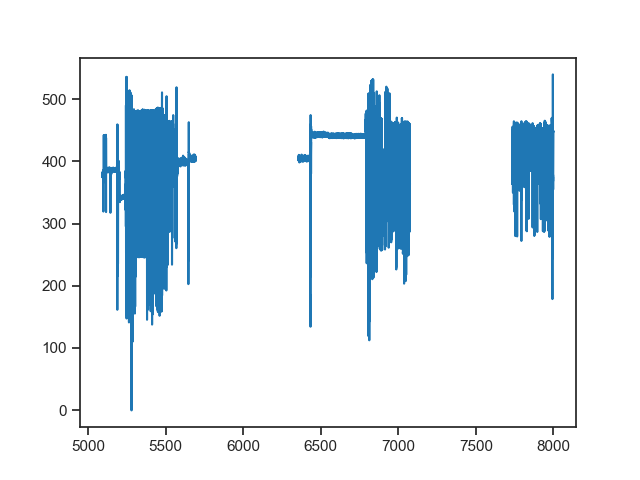

In [57]:
%matplotlib widget
start = 5000
duration = 3000

start = int(start * keypoint_series.rate)
duration = int(duration * keypoint_series.rate)
plt.figure(figsize=(13, 3))
plt.plot(np.arange(start, start + duration) / keypoint_series.rate, keypoint_series.data[start:start+duration, 0])

In [60]:
# count a percentage of missing keypoint data points

np.sum(np.isnan(keypoint_series.data[:, 0])) / keypoint_series.data.shape[0]

0.29724421296296294

### Coarse labels

In [41]:
coarse_labels = nwb.intervals['epochs'].to_dataframe()

In [64]:
mask = (coarse_labels.start_time > start / 30) & (coarse_labels.start_time < (start + duration) / 30)
coarse_labels[mask]

,start_time,stop_time,labels
id,,,
41,5092.533333,5212.600000,Talk
42,5212.600000,5212.700000,Blocklist (Data break)
43,5212.700000,5332.533333,Talk
44,5332.533333,5332.666667,Blocklist (Data break)
45,5332.666667,5455.066667,Talk
46,5455.066667,5455.333333,Blocklist (Data break)
47,5455.333333,5573.300000,Talk
48,5573.300000,5573.433333,Blocklist (Data break)
49,5573.433333,5694.700000,Talk


## Exploring "mining" data

In [79]:
root_path = r"D:\data_nma2022"
data_path = os.path.join(root_path, 'mining')
events_path = os.path.join(data_path, 'events')

In [82]:
fname = 'events_a0f66459_l_wrist.csv'
fpath = os.path.join(events_path, fname)

df = pd.read_csv(fpath, sep=',', index_col=0)
df.head()

,mvmt,day,event_frame_idx,event_timestamp,time,vid_name,run_01,run_01_conf,run_1_wconf,run_1,...,other_lag_overlap30,other_lead_lag,other_lead_overlap30,other_overlap_15pm,other_overlap_30pm,bimanual,ecog_start_idx_mvti,ecog_start_idx_full,ecog_end_idx_mvti,ecog_end_idx_full
0,l_wrist_1,5,1458,0 days 07:51:17.159999514,0 days 07:51:17.159999514,a0f66459_8_0002.avi,1458,NaN,1.000000,39,...,0.0,NaN,0.0,0.0,0.0,NaN,14138329,14138329,14138828,14139479
1,l_wrist_1,5,3303,0 days 07:54:17.945998899,0 days 07:54:17.945998899,a0f66459_8_0003.avi,60,0.991597,0.920539,44,...,3.0,NaN,0.0,0.0,3.0,NaN,14228722,14228722,14229221,14229955
2,l_wrist_1,5,59,0 days 07:58:29.682666647,0 days 07:58:29.682666647,a0f66459_8_0006.avi,55,1.000000,0.457582,51,...,26.0,-30.0,17.0,20.0,43.0,NaN,14354591,14354591,14355090,14355940
3,l_wrist_1,5,2476,0 days 08:21:50.757332508,0 days 08:21:50.757332508,a0f66459_8_0017.avi,33,0.999981,0.999947,35,...,0.0,NaN,0.0,0.0,0.0,NaN,15055128,15055128,15055627,15056211
4,l_wrist_1,5,2765,0 days 08:22:00.390665745,0 days 08:22:00.390665745,a0f66459_8_0017.avi,84,0.999796,0.970152,40,...,0.0,NaN,0.0,0.0,0.0,NaN,15059945,15059945,15060444,15061111


In [85]:
print(*list(df.columns), sep='\n')

mvmt
day
event_frame_idx
event_timestamp
time
vid_name
run_01
run_01_conf
run_1_wconf
run_1
run_10
run_10_conf
run_1_conf
start_x
start_y
end_x
end_y
reach_r
reach_a
reach_avg_conf
reach_duration
r2_poly1
r2_poly2
r2_poly3
shoulder_distance_mean
shoulder_slope_mean
offset_velocity
onset_velocity
other_lag_overlap
other_lag_overlap30
other_lead_lag
other_lead_overlap30
other_overlap_15pm
other_overlap_30pm
bimanual
ecog_start_idx_mvti
ecog_start_idx_full
ecog_end_idx_mvti
ecog_end_idx_full
